In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 15.3 MB/s eta 0:00:00


In [5]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils
import easyocr

In [6]:
import os
import sys

# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2022WI folder and put all the files under A4 folder, then "2022WI/A4"
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/computer-vision-implementations'
GOOGLE_DRIVE_PATH = os.path.join("drive", "My Drive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))


# Add to sys so we can import .py files.
sys.path.append(GOOGLE_DRIVE_PATH)

['dlib.ipynb', 'images', 'files', 'videos', 'calculate_the_vehicle_speed_using_opencv.ipynb', 'car_plate_recognation_using_opencv.ipynb']


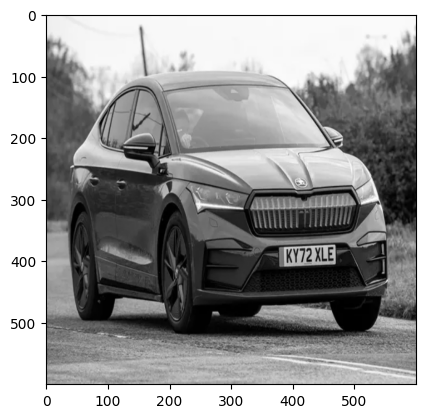

In [7]:
imgo = GOOGLE_DRIVE_PATH + '/images/'+"car_two.jpg"
img = cv2.imread(imgo)
img = cv2.resize(img,(600,600))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

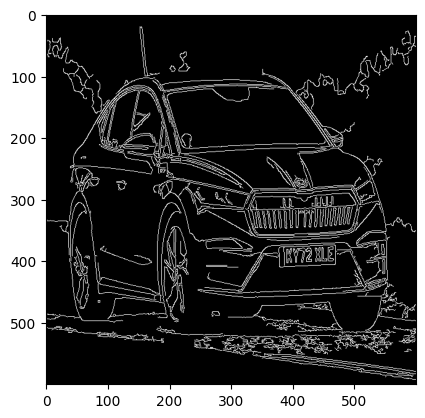

In [8]:
bfilter = cv2.bilateralFilter(gray,11,17,17)#noise reduction
edged = cv2.Canny(bfilter,30,200)#edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [9]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key=cv2.contourArea,reverse=True)[:10]
len(contours)

10

In [10]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:
        location = approx
        break
len(location)

4

In [11]:
approx[1][0][0]

380

In [12]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

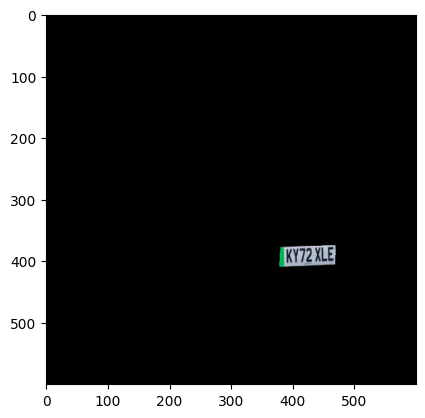

In [13]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [14]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_image= gray[x1:x2+1,y1:y2+1]

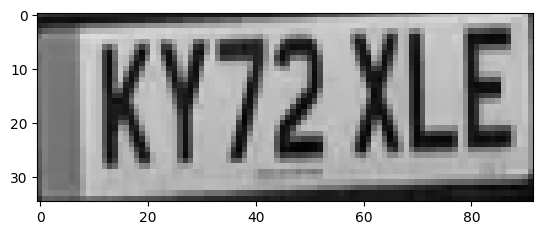

In [15]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [16]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[5, 0], [92, 0], [92, 35], [5, 35]], 'KYZ2XLE', 0.6603436797609551)]

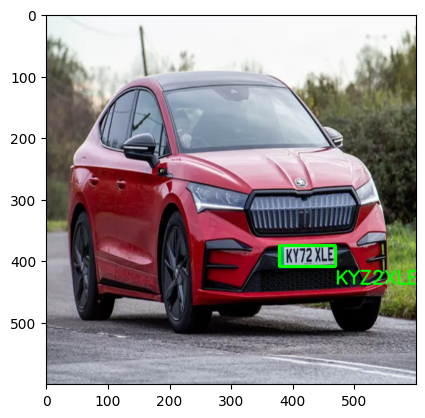

In [17]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=1,color=(0,255,0),thickness=2,lineType=cv2.LINE_AA)
res = cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))